/* =====================================================================================

CSPlib version 1.1.0
Copyright (2021) NTESS
https://github.com/sandialabs/csplib

Copyright 2021 National Technology & Engineering Solutions of Sandia, LLC (NTESS).
Under the terms of Contract DE-NA0003525 with NTESS, the U.S. Government retains
certain rights in this software.

This file is part of CSPlib. CSPlib is open-source software: you can redistribute it
and/or modify it under the terms of BSD 2-Clause License
(https://opensource.org/licenses/BSD-2-Clause). A copy of the license is also
provided under the main directory

Questions? Contact Habib Najm at <hnnajm@sandia.gov>, or
           Kyungjoo Kim at <kyukim@sandia.gov>, or
           Oscar Diaz-Ibarra at <odiazib@sandia.gov>

Sandia National Laboratories, Livermore, CA, USA
===================================================================================== */

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
from CSPindexHelper import *
import os
os.getcwd() 

'/Users/odiazib/csp_clang_bld_develop/csp/install/release/example/runs/GRI3'

#### Load data base produced by TChemV2

In [2]:
data = np.genfromtxt("data/input.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)
print(np.shape(solTchem))

(1501, 59)


/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

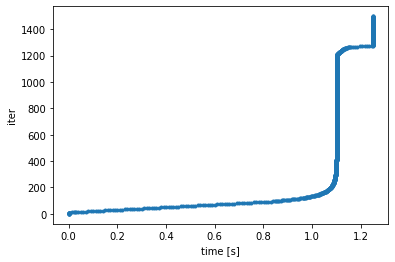

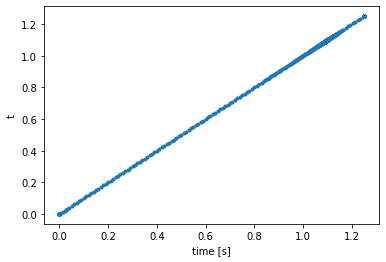

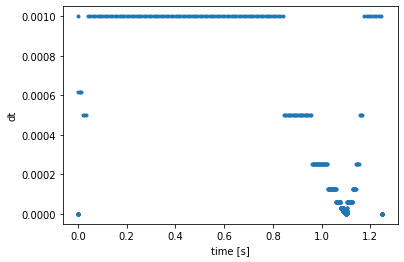

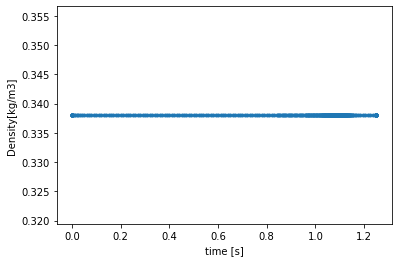

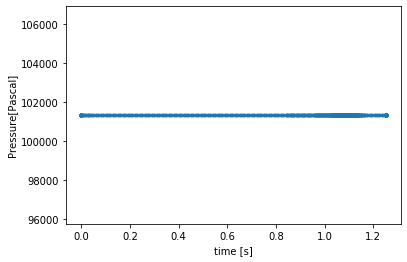

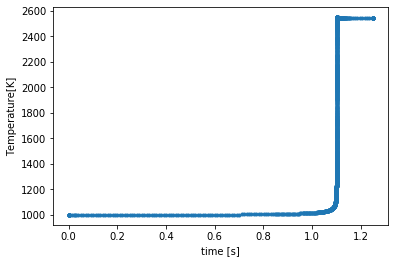

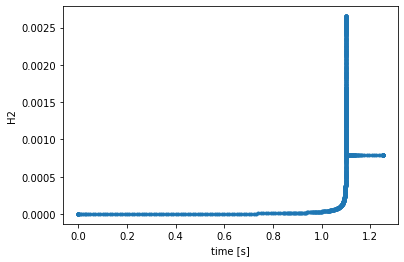

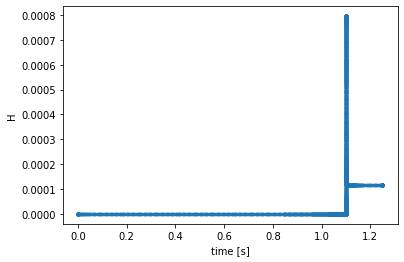

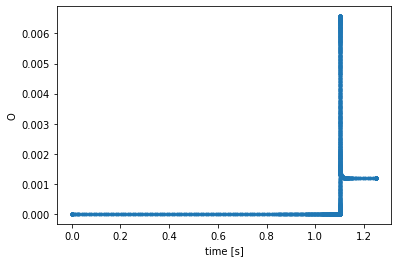

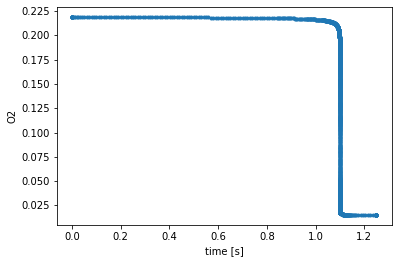

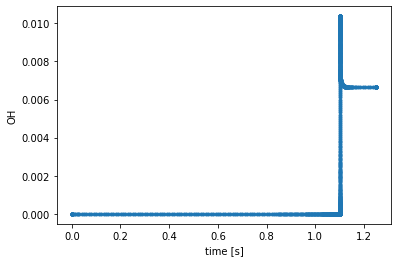

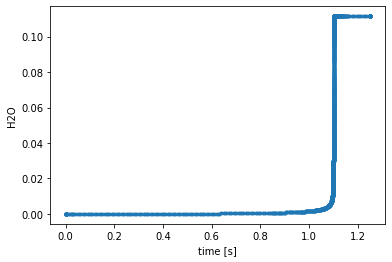

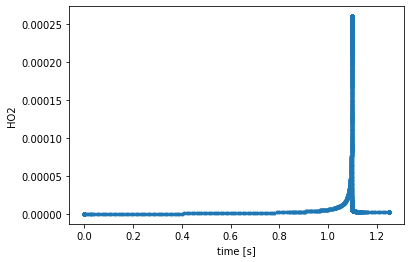

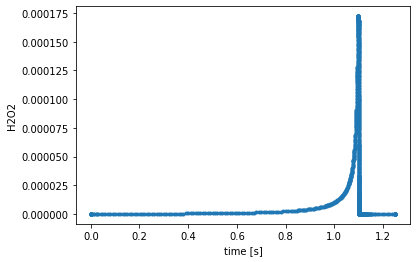

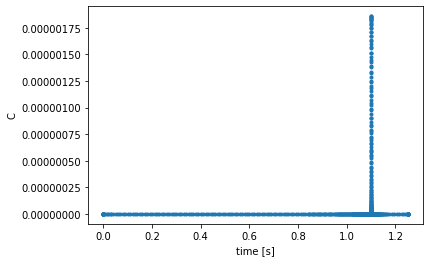

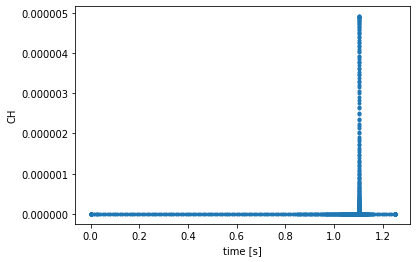

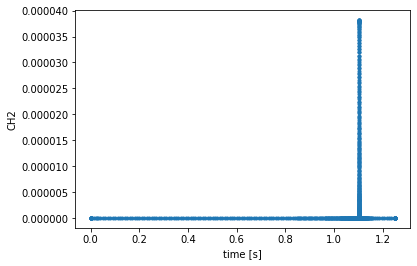

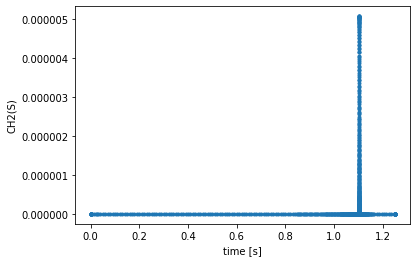

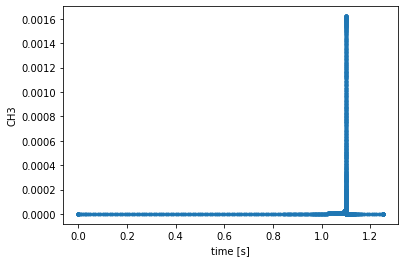

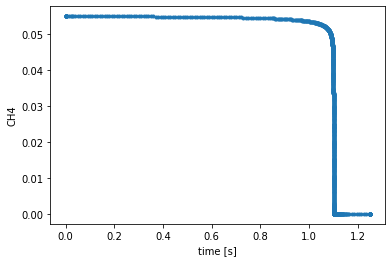

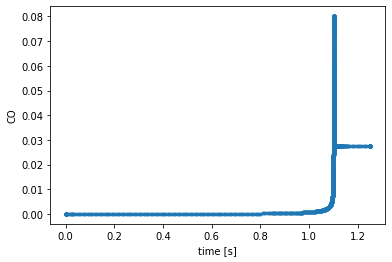

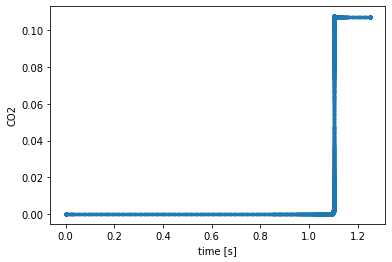

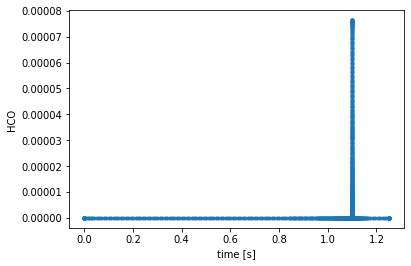

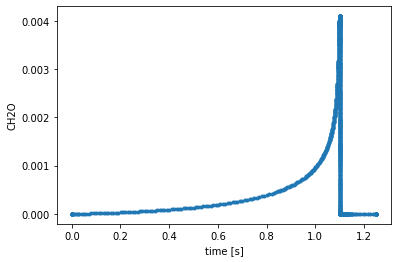

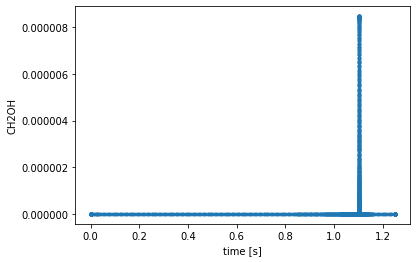

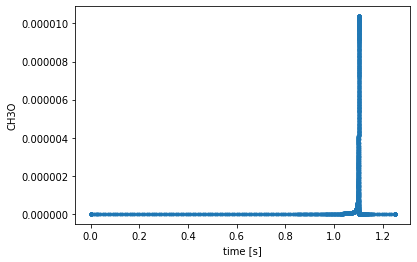

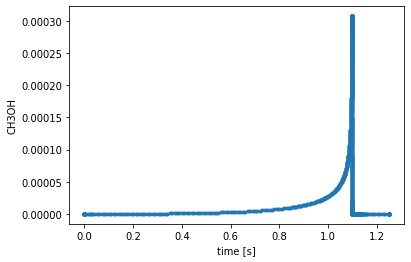

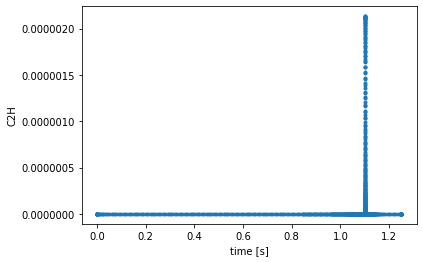

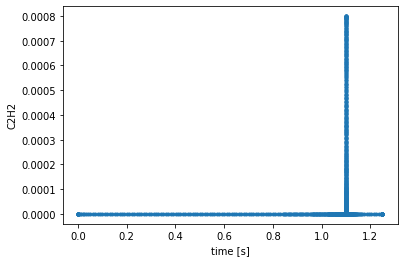

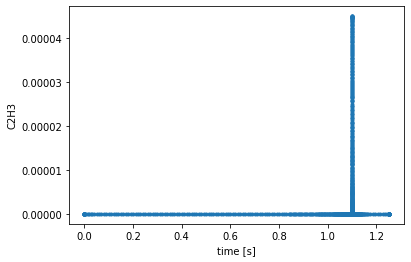

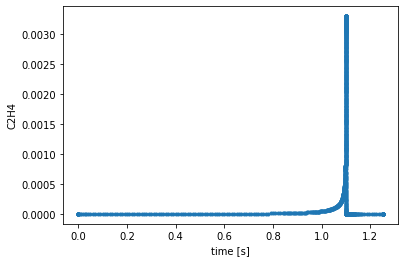

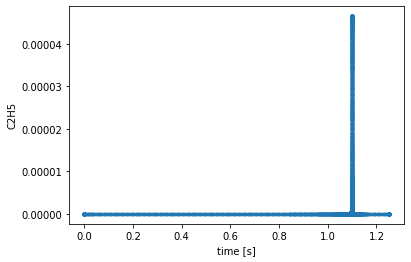

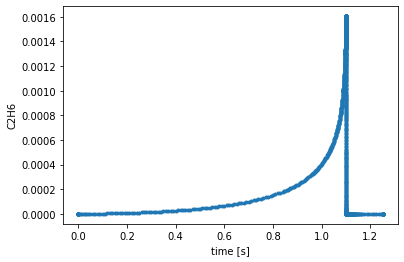

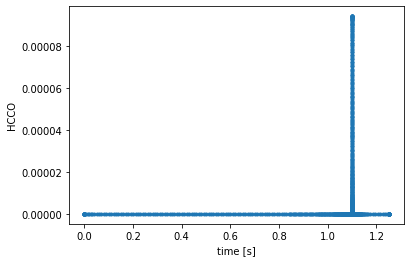

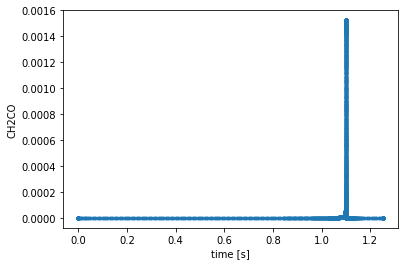

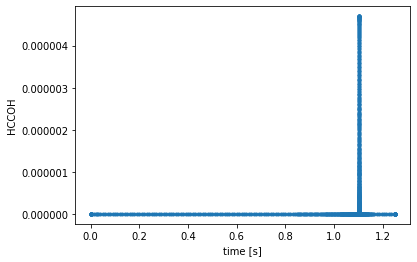

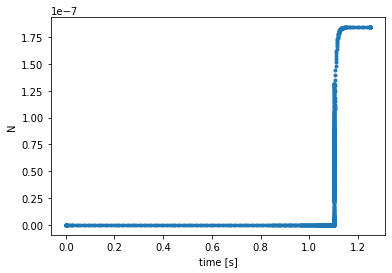

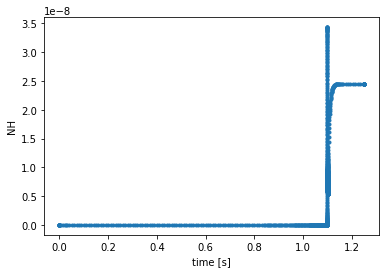

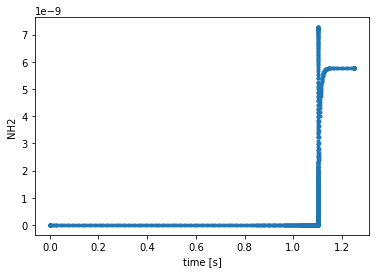

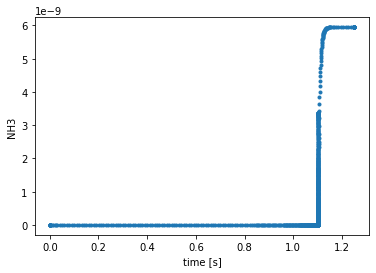

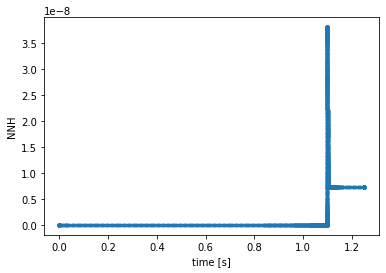

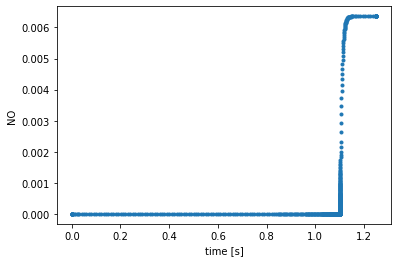

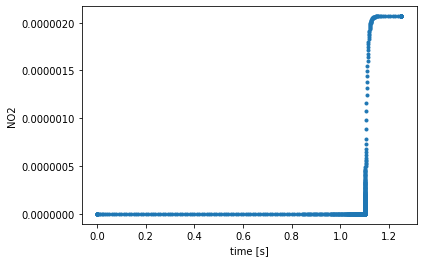

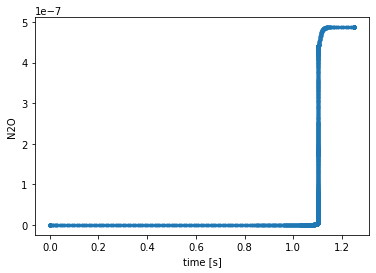

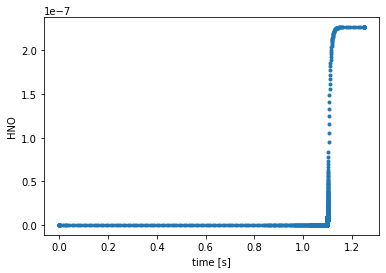

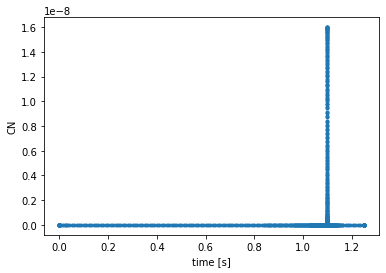

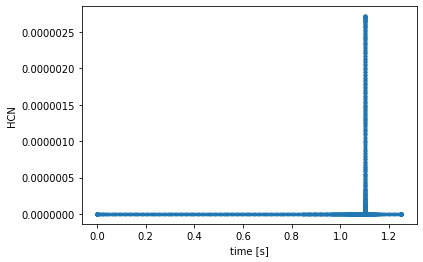

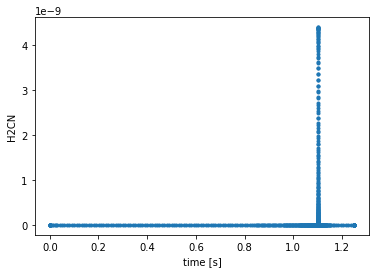

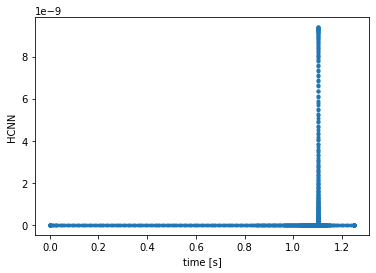

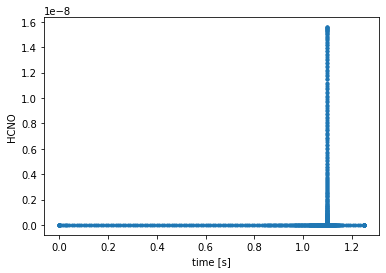

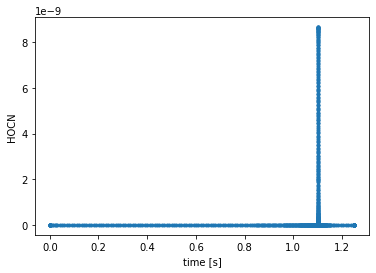

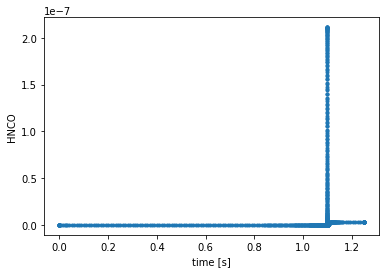

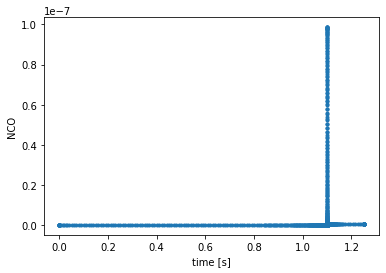

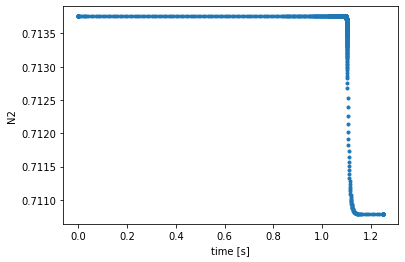

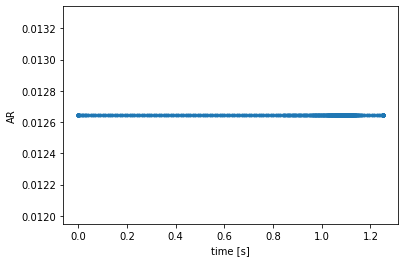

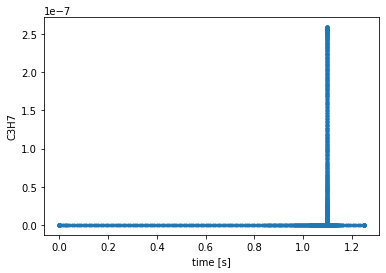

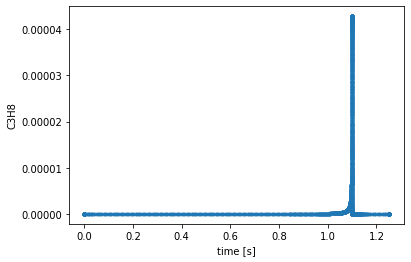

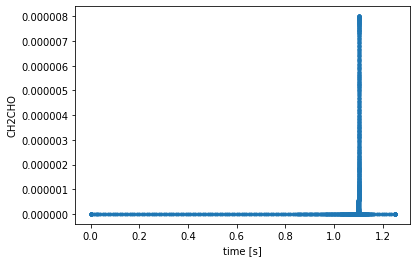

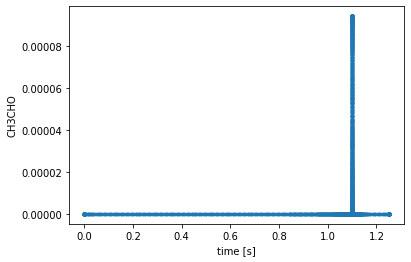

In [3]:
for var in Header:
    plt.figure()
    plt.plot(solTchem[:, Header.index('t')], solTchem[:, Header.index(var),],'.')
    plt.xlabel('time [s]')
    plt.ylabel(var)

#### Load CSP data

In [4]:
firstname ='csp_output/'
m = np.loadtxt( firstname +'_m.dat')
tau = np.loadtxt( firstname +"_tau.dat")

### Number of exhausted modes (M) vs Time 

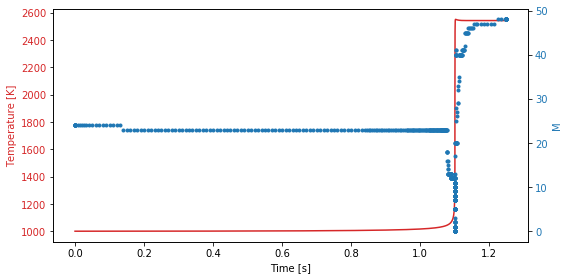

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('M',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], m,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('M.pdf')

#### Time scales 

In [6]:
Nvar = len(tau[0,:])
tmp = []
for i,M in enumerate(m):
    if (M == Nvar ):
        tmp += [tau[i,int(M-1)]]     
    else:
        tmp += [tau[i,int(M)]] 

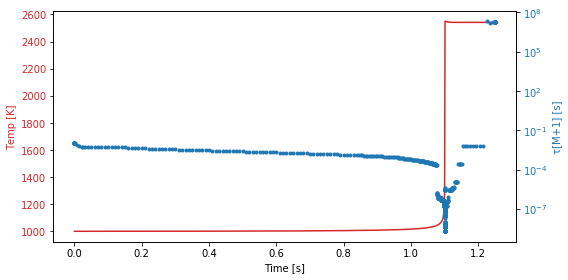

In [7]:
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temp [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('τ[M+1] [s]',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], tmp,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tauMp.pdf')

In [8]:
rank_jac= np.loadtxt(firstname +'_jac_numerical_rank.dat')

In [9]:
tmrank = []
for i,M in enumerate(m):
    if rank_jac[i] == Nvar:
        tmrank += [tau[i,Nvar-1]]
    else:    
        tmrank += [tau[i,int(rank_jac[i])]]

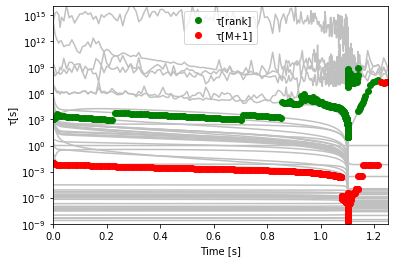

In [10]:
plt.figure()

for i in range(len(tau[0,:])):
    plt.plot(solTchem[:,1],tau[:,i],'silver')
plt.plot(solTchem[:,1],tmrank,'go', label='τ[rank]')  
plt.plot(solTchem[:,1],tmp,'ro', label='τ[M+1]')    
plt.xlabel('Time [s]')
plt.ylabel('τ[s]')
plt.yscale('log')
plt.legend(loc='best')
plt.xlim([-5e-4,1.25])
plt.ylim([1e-9,1e16])
plt.savefig('timeScales.pdf')

In [11]:
Rnames = np.loadtxt('kmod.reactions',dtype=np.str,delimiter=",")

rfwdL = []
rrevL = []
for Reac in Rnames:
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + r' $\rightarrow$ ' + out[1]
    rrev = out[0] + r' $\leftarrow$ ' + out[1]
    rfwdL += [rfwd]
    rrevL += [rrev]
    
    
logNamesReactions =  rfwdL +  rrevL      
NgasReac = 2*len(Rnames)
NtotalReactions= len(logNamesReactions)

In [12]:
print('Total Number of reactions',NtotalReactions)

Total Number of reactions 650


In [13]:
NtimeStep, Ndime = np.shape(solTchem)
species_names = np.loadtxt('speciesNames.dat',dtype='str')
ngasSpec = len(species_names)
nameRHS = ['Temperature[K]']
for i in range(len(species_names)):
    nameRHS += [species_names[i]]

In [14]:
def makePlotIndices( t, var, indices, ind_list, namesReactions,\
                   xlabel_1, ylabel_1, ylabel_2, \
                   legend_loc_x, legend_loc_y):
    
    fig, ax1 = plt.subplots()
    color = 'k'
    ax1.set_xlabel(xlabel_1)
    ax1.set_ylabel(ylabel_1, color=color)
    ax1.plot(t,var,'--.', color=color)
    
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(ylabel_2,color=color)
    
    for i in ind_list:
        ax2.plot(t,\
                 indices[:,i],'-',label=namesReactions[i])
    ax2.legend(loc='best', \
               bbox_to_anchor=(legend_loc_x,legend_loc_y) )
    ax2.tick_params(axis='y', labelcolor=color)
    return 

#### CSP pointers  

In [15]:
Pointers = np.loadtxt(firstname +'_cspPointers.dat')
Ptrs = np.reshape(Pointers,[NtimeStep,Nvar,Nvar])

In [16]:
f = np.loadtxt(firstname +'_f.dat')

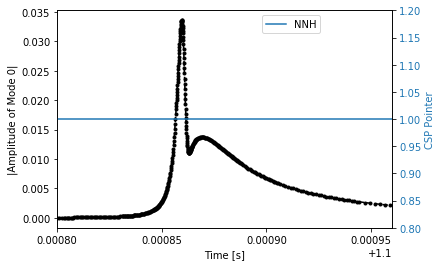

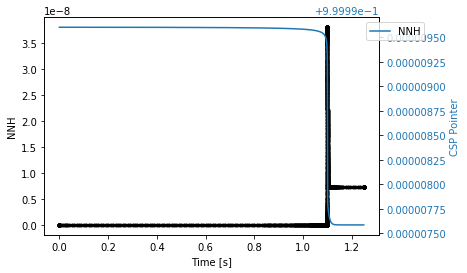

In [18]:
IndVar= 0
MaxPInd, IndxList = getTopIndex(Ptrs, IndVar, Top=2, threshold=1e-3)   
makePlotIndices(solTchem[:,Header.index('t')], abs(f[:,IndVar]),\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1='|Amplitude of Mode '+str(IndVar)+'|', ylabel_2='CSP Pointer', \
                legend_loc_x=0.8, legend_loc_y=1)
xmin=1.1008
xmax=1.10096
plt.xlim([xmin,xmax])
plt.ylim([0.8,1.2])
plt.xticks(np.arange(xmin, xmax, 5e-5))
# plt.xscale('log')
plt.savefig('Mode'+str(IndVar)+'_CSPPointer.pdf', bbox_inches='tight')
VarName = nameRHS[IndxList[0]]
makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)

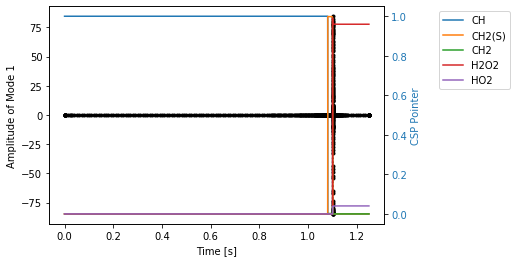

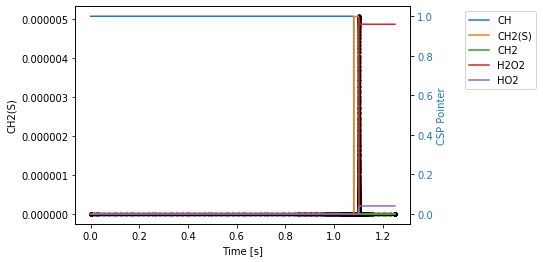

In [20]:
IndVar= 1
MaxPInd, IndxList = getTopIndex(Ptrs, IndVar, Top=2, threshold=1e-2)   
makePlotIndices(solTchem[:,Header.index('t')], f[:,IndVar],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1='Amplitude of Mode '+str(IndVar), ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)

VarName = nameRHS[IndxList[1]]
makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)

#### Slow importance indices 

In [21]:
Slowind = np.loadtxt(firstname +'_SlowImportanceIndex.dat')
St = np.reshape(Slowind,[NtimeStep,Nvar,NtotalReactions])

In [22]:
variables = ['Temperature[K]','CH4','CO2', 'CO', 'H2','O2']

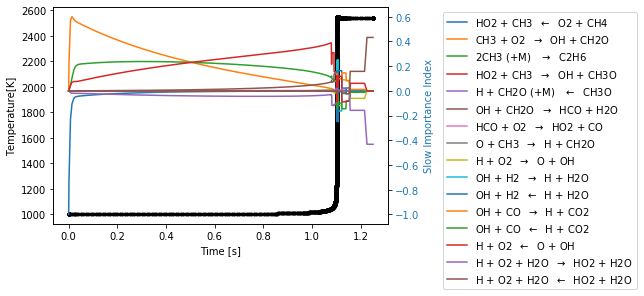

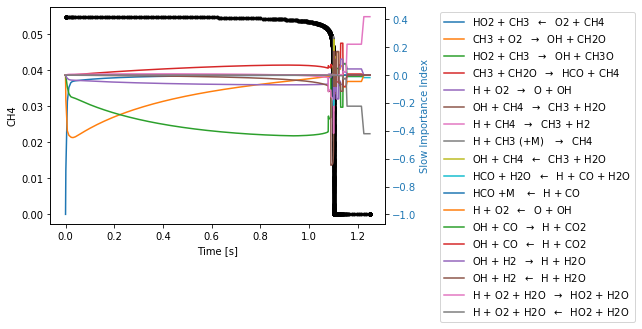

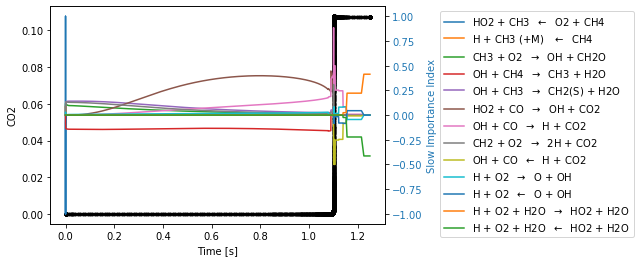

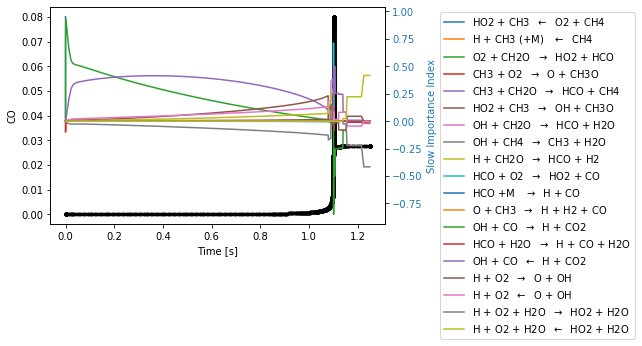

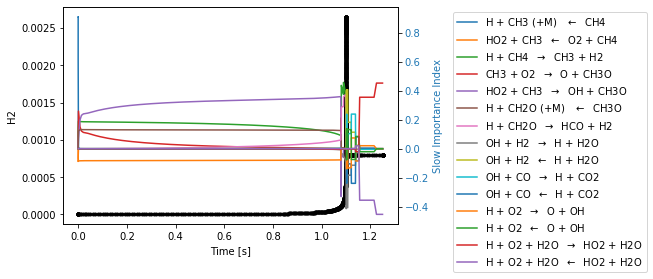

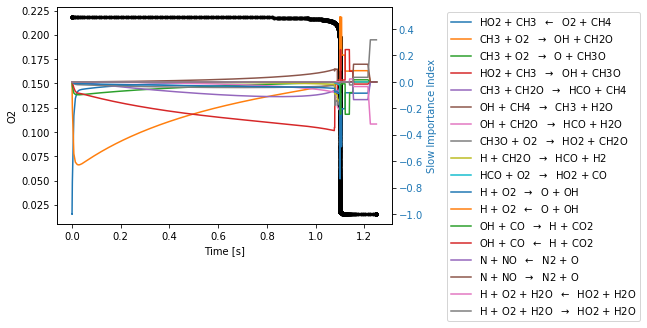

In [23]:

initial=0
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(St[initial:,:,:], IndVar,Top=2)  
    makePlotIndices(solTchem[initial:,Header.index('t')], solTchem[initial:,Header.index(VarName)],\
                St[initial:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Slow Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
    plt.savefig(VarName+'_SlowIndex.pdf', bbox_inches='tight')

#### Slow importance indices at ignition point 

In [24]:
time = solTchem[:,Header.index('t')]
mean_time = 1.101
sigma_time = 0.01
sel_points = np.where(abs(time-mean_time) < sigma_time)[0] 

In [39]:
# MaxPInd, IndxList = getTopIndex(St[sel_points,:,:], 0,Top=3,threshold=1e-2)

# suma=0
# print('------')
# for indx in IndxList:
#     suma += abs(St[sel_points[1],0,indx])
#     print(St[sel_points[1],0,indx])
# fast_ord = np.argsort(-1*abs(St[sel_points[1],0,:]))  
    
# print('total:',np.sum(abs(St[sel_points[1],0,:] )))    
# print('indiv',suma)
# print('------')
# for indx in fast_ord:
#     print(St[sel_points[1],0,indx])

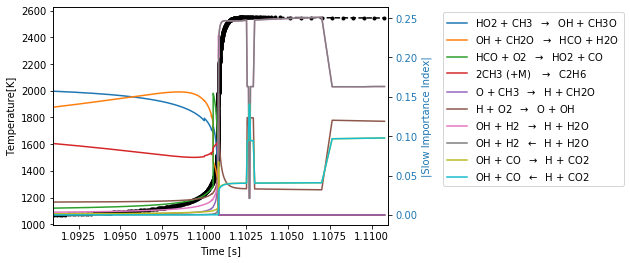

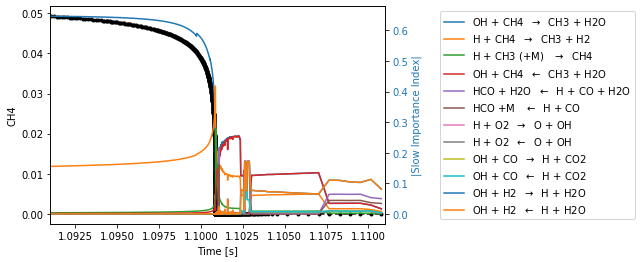

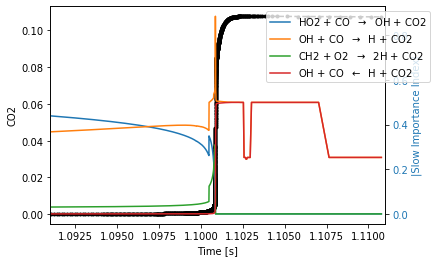

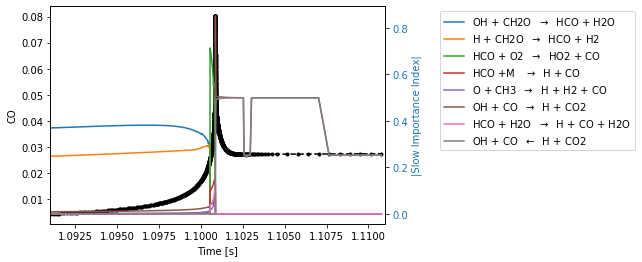

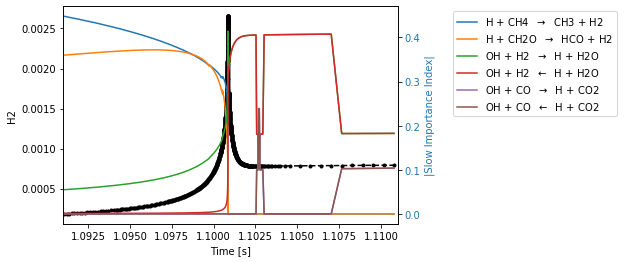

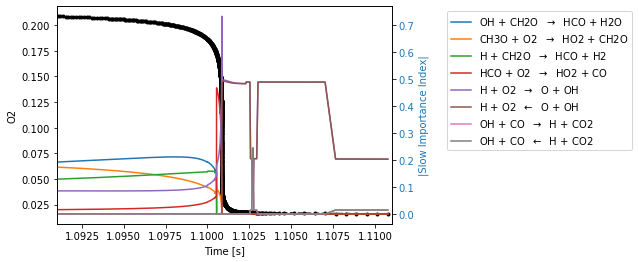

In [26]:
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(St[sel_points,:,:], IndVar,Top=2,threshold=1e-2)

    makePlotIndices(solTchem[sel_points,Header.index('t')], solTchem[sel_points,Header.index(VarName)],\
               abs(St[sel_points,IndVar,:]), IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='|Slow Importance Index|', \
                legend_loc_x=1.15, legend_loc_y=1)
    plt.xlim([mean_time -sigma_time,mean_time +sigma_time])
    plt.savefig(VarName+'_SlowIndexZoom.pdf', bbox_inches='tight')

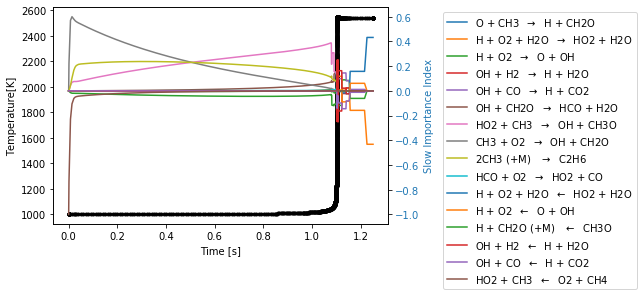

In [27]:
TempTopSlowIndx = np.loadtxt(firstname \
                             +'_Temperature_SlowImportanceIndexTopElemPosition.dat',dtype=int)
Temp_slowindx = np.loadtxt(firstname + \
                          '_Temperature_SlowImportanceIndex.dat')

VarName = "Temperature[K]"
makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Temp_slowindx, TempTopSlowIndx, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Slow Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)

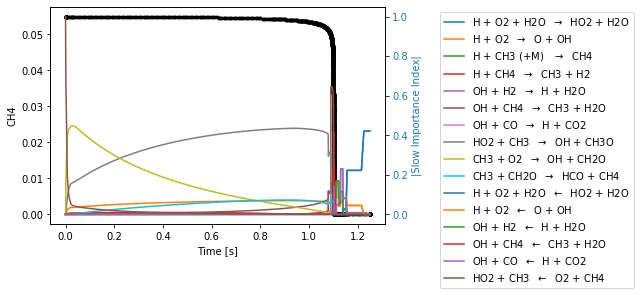

In [28]:
ch4TopSlowIndx = np.loadtxt(firstname + \
                            '_CH4_SlowImportanceIndexTopElemPosition.dat',dtype=int)
ch4_slowindx = np.loadtxt(firstname + \
                          '_CH4_SlowImportanceIndex.dat')

VarName = "CH4"

makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                abs(ch4_slowindx), ch4TopSlowIndx, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='|Slow Importance Index|', \
                legend_loc_x=1.15, legend_loc_y=1)
plt.savefig(VarName+'_SlowIndexV2.pdf', bbox_inches='tight')

#### Fast importance indices 

In [29]:
Fastind = np.loadtxt(firstname +'_FastImportanceIndex.dat')
Ft = np.reshape(Fastind,[NtimeStep,Nvar,NtotalReactions])

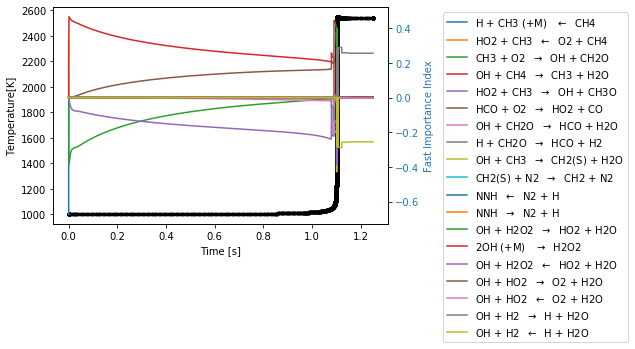

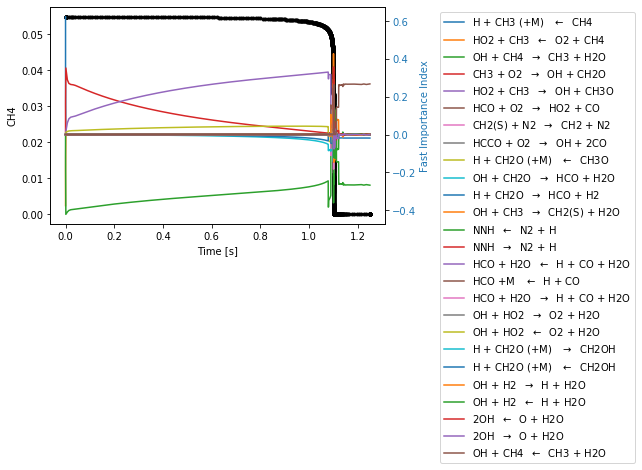

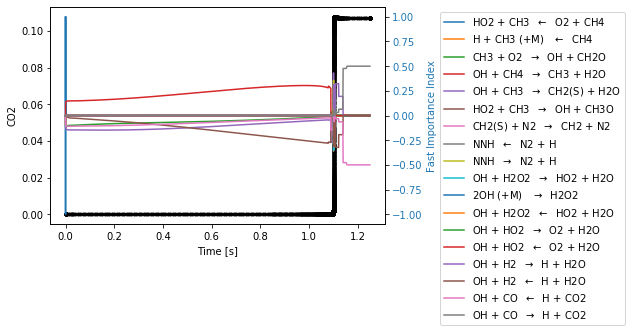

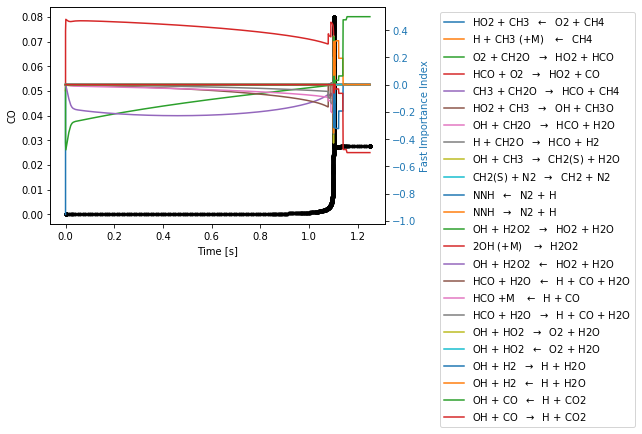

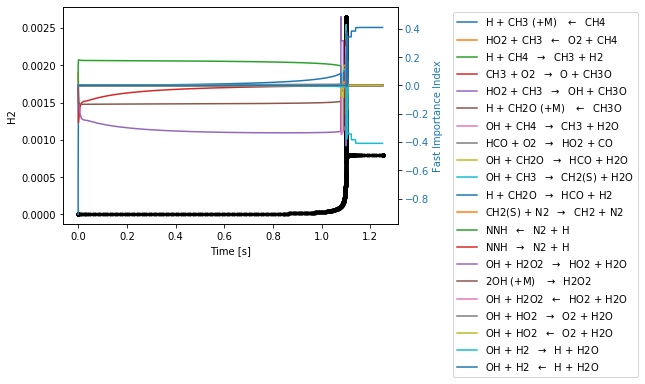

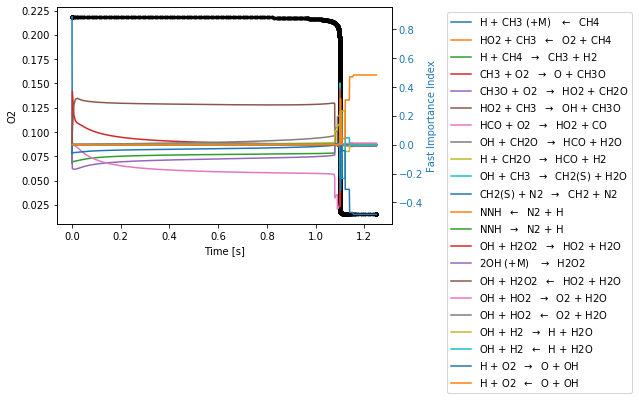

In [30]:
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(Ft, IndVar,Top=2)    
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ft[:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Fast Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
    plt.savefig(VarName+'_FastIndex.pdf', bbox_inches='tight')

#### Slow importance indices at ignition point 

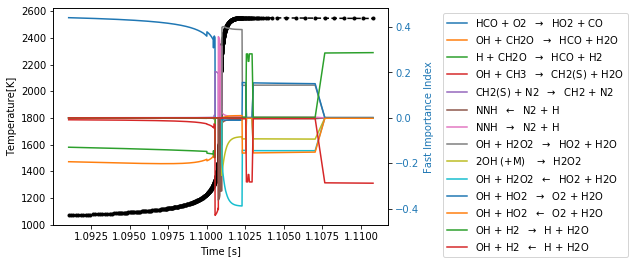

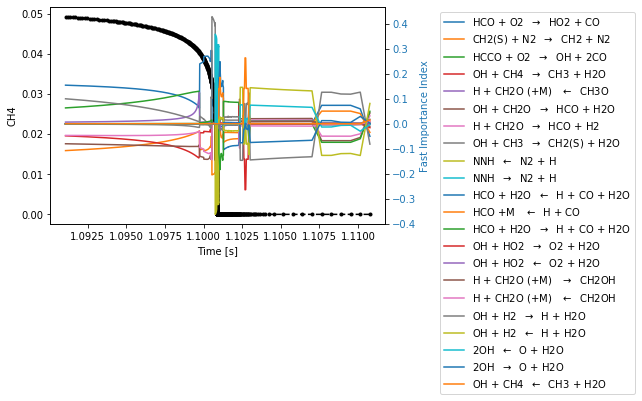

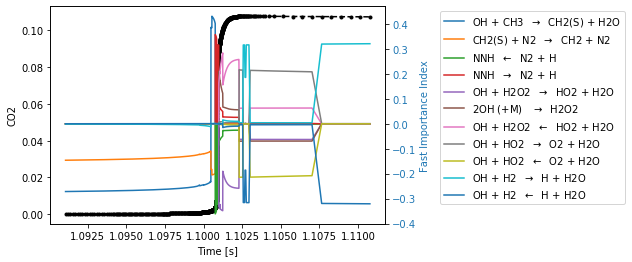

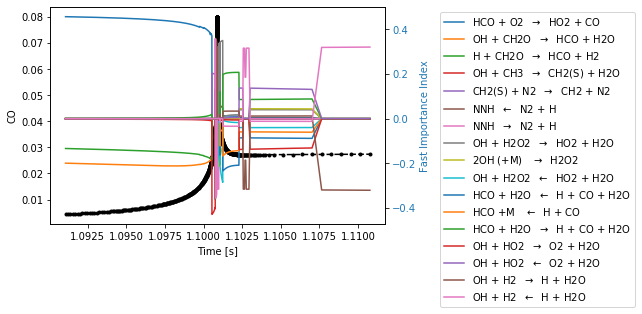

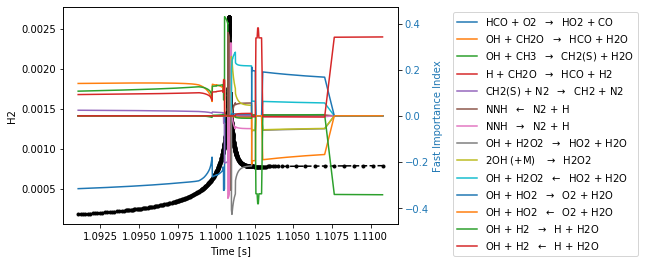

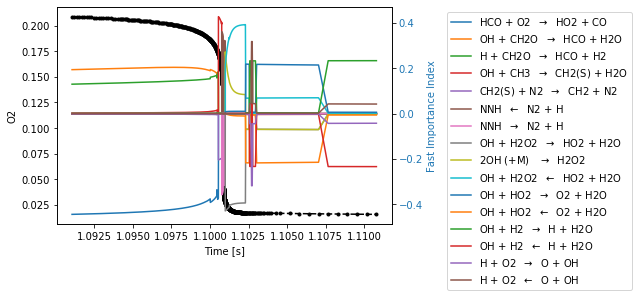

In [31]:
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(Ft[sel_points,:,:], IndVar,Top=2)    
    makePlotIndices(solTchem[sel_points,Header.index('t')], solTchem[sel_points,Header.index(VarName)],\
                Ft[sel_points,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Fast Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
plt.savefig(VarName+'_FastIndexZoom.pdf', bbox_inches='tight')

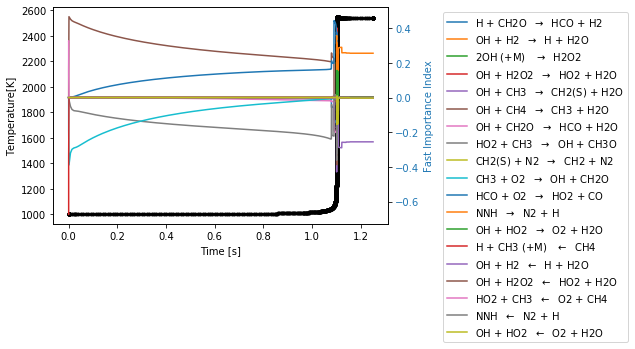

In [32]:
TempTopFastIndx = np.loadtxt(firstname \
                             +'_Temperature_FastImportanceIndexTopElemPosition.dat',dtype=int)
Temp_fastindx = np.loadtxt(firstname + \
                          '_Temperature_FastImportanceIndex.dat')

VarName = "Temperature[K]"
makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Temp_fastindx, TempTopFastIndx, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Fast Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)

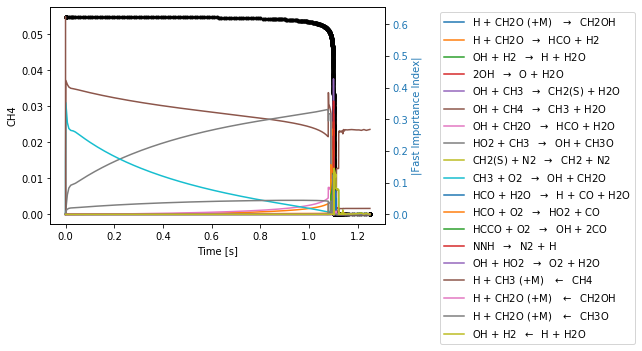

In [33]:
ch4TopFastIndx = np.loadtxt(firstname + \
                            '_CH4_FastImportanceIndexTopElemPosition.dat',dtype=int)
ch4_fastindx = np.loadtxt(firstname + \
                          '_CH4_FastImportanceIndex.dat')

VarName = "CH4"

makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                abs(ch4_fastindx), ch4TopFastIndx, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='|Fast Importance Index|', \
                legend_loc_x=1.15, legend_loc_y=1)
plt.savefig(VarName+'_FastIndexV2.pdf', bbox_inches='tight')

#### Participation indices 

In [34]:
PIind = np.loadtxt(firstname +'_ParticipationIndex.dat')
Pt = np.reshape(PIind,[NtimeStep,Nvar,NtotalReactions])

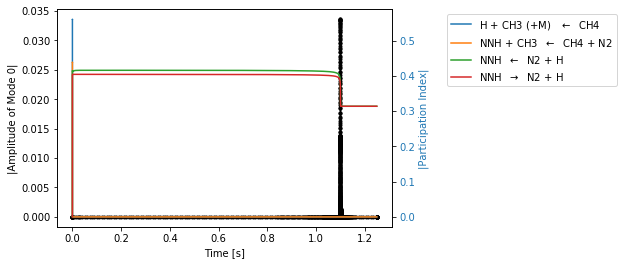

In [35]:
VarName = '|Amplitude of Mode 0|'
ModN=0
IndxList = getPartTopIndex(Pt, ModN, m, Top=2, threshold=1e-2)
makePlotIndices(solTchem[:,Header.index('t')], abs(f[:,ModN]),\
                abs(Pt[:,ModN,:]), IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='|Participation Index|', \
                legend_loc_x=1.15, legend_loc_y=1)
plt.savefig('PartIndexM0.pdf', bbox_inches='tight')

#### Participation indices at ignition point 

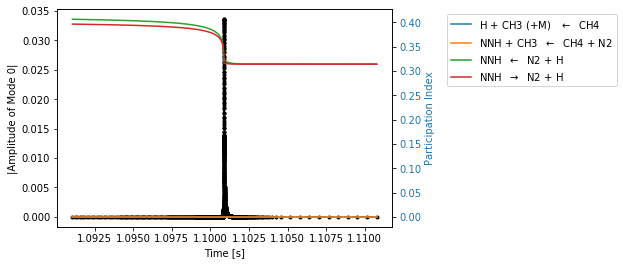

In [36]:
IndxList = getPartTopIndex(Pt, ModN, m, Top=2, threshold=1e-2)
makePlotIndices(solTchem[sel_points,Header.index('t')], abs(f[sel_points,ModN]),\
                abs(Pt[sel_points,ModN,:]), IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Participation Index', \
                legend_loc_x=1.15, legend_loc_y=1)

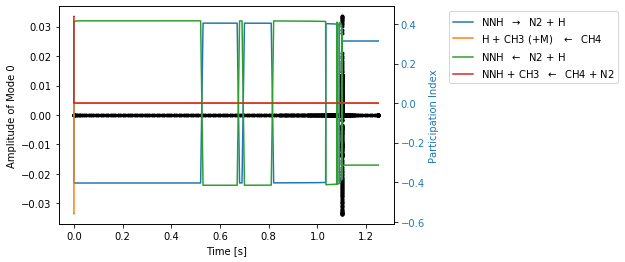

In [37]:
Mode0TopFastIndx = np.loadtxt(firstname + \
                            '_Mode0_ParticipationIndexTopElemPosition.dat',dtype=int)
Mode0_fastindx = np.loadtxt(firstname + \
                          '_Mode0_ParticipationIndex.dat')

VarName = 'Amplitude of Mode 0'

makePlotIndices(solTchem[:,Header.index('t')], f[:,ModN],\
                Mode0_fastindx, Mode0TopFastIndx, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Participation Index', \
                legend_loc_x=1.15, legend_loc_y=1)

#### Make a small data base around ingition point

In [38]:
variablesdb = ['t','Density[kg/m3]','Pressure[Pascal]','Temperature[K]' ]
db = []
for var in variablesdb:
    db += [solTchem[sel_points,Header.index(var)]]
for var in species_names:
    db += [solTchem[sel_points,Header.index(var)]]
db = np.array(db).T
np.savetxt('gri30database.dat',db)